In [1]:
import matplotlib.pyplot as plt
import sys
import matplotlib
import numpy as np
import os
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo, z_at_value
import coop_post_processing as cpp
from scipy import ndimage
import coop_setup_funcs as csf
import warnings
from astropy.visualization import quantity_support
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
# set plot params
import matplotlib as mpl
import scipy as sp
mpl.font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 3}
plt.rcParams.update({'font.size': 14})
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
import healpy as hp

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import stats as st
dir='/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/'

In [2]:
# Define the distance bins
dbins = [[893, 1393], [1493, 1993], [2093, 2593], [2693,3193]]
for dbin in dbins:
    print(z_at_value(cosmo.comoving_distance, (dbin[0]-50)*u.Mpc),z_at_value(cosmo.comoving_distance, (dbin[1]+50)*u.Mpc))

zbins = ['0pt20_0pt36', '0pt36_0pt53', '0pt53_0pt72', '0pt72_0pt94'] # the z bins for number density maps
#actpath  = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/"
# buzzpath = "/mnt/scratch-lustre/mlokken/stacking/Buzzard_paper2/"
# mask =  "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits"

0.19985555905328484 redshift 0.3565167560560754 redshift
0.3565167560560754 redshift 0.5289988643902372 redshift
0.5289988643902372 redshift 0.7215854982816572 redshift
0.7215854982816572 redshift 0.9396687416637612 redshift


## Before running anything involving $\delta_g$, get the $n_g$ means

In [3]:
#I will save them here because the above step takes awhile each time
gmeans_des = [0.012851488746377471,
 0.01384506870003849,
 0.015309714690043979,
 0.02416508546990377] 
sigmas_des = [0.11411745657892501,
 0.11853421305018025,
 0.12470429494305643,
 0.15656805187048936]

gmeans_buzz = [0.02068857930314309,
 0.023266196557397364,
 0.025528530068527806,
 0.04170948736146642]
sigmas_buzz = [0.14533079924726627,
 0.15487514164457497,
 0.16134637386239412,
 0.20581860847657216]

## First we will work with the fiducial setup:
- $\nu>2$, $e>0.3$
- 24 regions
- $\lambda>20$
- Orient with Hessian, X and Y positive gradients flipped towards horizontal / vertical
- 75 \% of Maglim data for orientation, 25 \% goes into number density maps

In [4]:
nu_e_cuts = True
if nu_e_cuts:
    pt_selection_str = 'nugt2_egtpt3_'
else:
    pt_selection_str = ''
nreg = 24


## Null test: is the number of profiles beyond 1 sigma equal to 68% of the total number of profiles?

5
rvals [ 2.88659794  8.52233677 14.1580756  19.79381443 25.42955326 31.0652921
 36.70103093]
KS test for m = 0
Distrib is same? True for 2.88659793814433
Distrib is same? True for 8.52233676975945
Distrib is same? True for 14.158075601374568
Distrib is same? True for 19.79381443298969
Distrib is same? True for 25.429553264604813
Distrib is same? True for 31.06529209621993
Distrib is same? True for 36.701030927835056
---------
KS test for m = 1
Distrib is same? True for 2.88659793814433
Distrib is same? False for 8.52233676975945
Distrib is same? True for 14.158075601374568
Distrib is same? True for 19.79381443298969
Distrib is same? True for 25.429553264604813
Distrib is same? True for 31.06529209621993
Distrib is same? True for 36.701030927835056
---------
KS test for m = 2
Distrib is same? True for 2.88659793814433
Distrib is same? True for 8.52233676975945
Distrib is same? True for 14.158075601374568
Distrib is same? True for 19.79381443298969
Distrib is same? True for 25.429553264

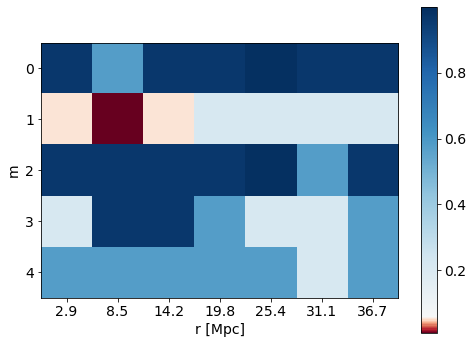

5
rvals [ 2.92134831  8.53932584 14.15730337 19.7752809  25.39325843 31.01123596
 36.62921348]
KS test for m = 0
Distrib is same? True for 2.9213483146067416
Distrib is same? True for 8.539325842696629
Distrib is same? True for 14.157303370786517
Distrib is same? True for 19.775280898876403
Distrib is same? True for 25.39325842696629
Distrib is same? True for 31.011235955056183
Distrib is same? True for 36.62921348314607
---------
KS test for m = 1
Distrib is same? True for 2.9213483146067416
Distrib is same? True for 8.539325842696629
Distrib is same? True for 14.157303370786517
Distrib is same? True for 19.775280898876403
Distrib is same? True for 25.39325842696629
Distrib is same? True for 31.011235955056183
Distrib is same? True for 36.62921348314607
---------
KS test for m = 2
Distrib is same? True for 2.9213483146067416
Distrib is same? True for 8.539325842696629
Distrib is same? True for 14.157303370786517
Distrib is same? True for 19.775280898876403
Distrib is same? True for 25

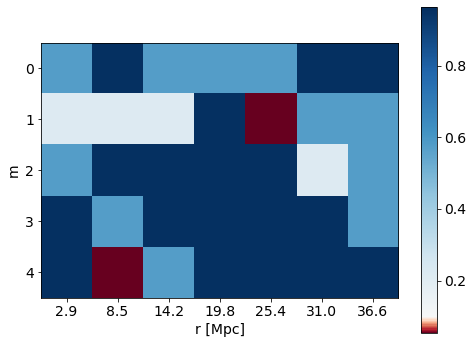

5
rvals [ 2.8125  8.125  13.4375 18.75   24.0625 29.375  34.6875]
KS test for m = 0
Distrib is same? True for 2.8125
Distrib is same? True for 8.125
Distrib is same? True for 13.4375
Distrib is same? True for 18.75
Distrib is same? True for 24.0625
Distrib is same? True for 29.375
Distrib is same? True for 34.6875
---------
KS test for m = 1
Distrib is same? True for 2.8125
Distrib is same? True for 8.125
Distrib is same? True for 13.4375
Distrib is same? True for 18.75
Distrib is same? True for 24.0625
Distrib is same? True for 29.375
Distrib is same? True for 34.6875
---------
KS test for m = 2
Distrib is same? True for 2.8125
Distrib is same? True for 8.125
Distrib is same? True for 13.4375
Distrib is same? True for 18.75
Distrib is same? True for 24.0625
Distrib is same? True for 29.375
Distrib is same? True for 34.6875
---------
KS test for m = 3
Distrib is same? True for 2.8125
Distrib is same? True for 8.125
Distrib is same? True for 13.4375
Distrib is same? True for 18.75
Distr

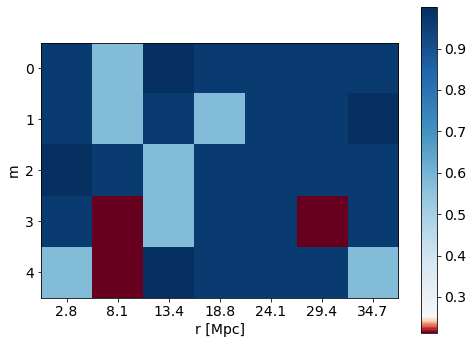

5
rvals [ 2.8  8.  13.2 18.4 23.6 28.8 34. ]
KS test for m = 0
Distrib is same? True for 2.8
Distrib is same? True for 8.0
Distrib is same? True for 13.2
Distrib is same? True for 18.400000000000002
Distrib is same? True for 23.6
Distrib is same? True for 28.799999999999997
Distrib is same? True for 34.0
---------
KS test for m = 1
Distrib is same? True for 2.8
Distrib is same? True for 8.0
Distrib is same? True for 13.2
Distrib is same? True for 18.400000000000002
Distrib is same? True for 23.6
Distrib is same? True for 28.799999999999997
Distrib is same? True for 34.0
---------
KS test for m = 2
Distrib is same? True for 2.8
Distrib is same? True for 8.0
Distrib is same? True for 13.2
Distrib is same? True for 18.400000000000002
Distrib is same? True for 23.6
Distrib is same? True for 28.799999999999997
Distrib is same? True for 34.0
---------
KS test for m = 3
Distrib is same? True for 2.8
Distrib is same? True for 8.0
Distrib is same? True for 13.2
Distrib is same? True for 18.4000

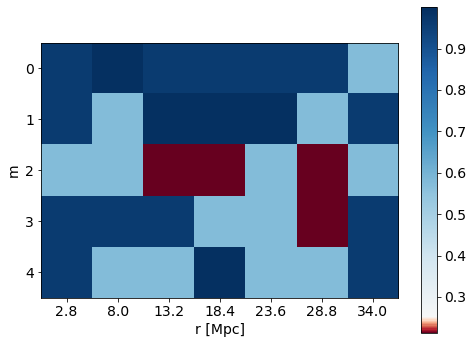

<Figure size 576x432 with 0 Axes>

In [15]:
# Making sure errors make sense
plot=True


import compare_distribs as cd
for c, dbin in enumerate(dbins):
    cl_dlow, cl_dhi = dbin[0], dbin[1]
    dlow   = cl_dlow-50
    dhi    = cl_dhi+50
    zlow   = z_at_value(cosmo.comoving_distance, cl_dlow*u.Mpc)
    zhi    = z_at_value(cosmo.comoving_distance, cl_dhi*u.Mpc)
    mapstr = f'DES_maglim_z_{zbins[c]}'
    #print(zlow, zhi)
    mapstr = f'DES_maglim_z_{zbins[c]}'
    errs   = np.load(dir+"/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg), allow_pickle=True)
    full   = np.load(dir+"/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg), allow_pickle=True)
    profs = np.asarray(errs['prof'])
    act = cpp.Stack_object(img_splits=errs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=errs['npks_list'], rad_in_Mpc=40)
    idx_r20 = np.where(np.abs(act.r-20) == np.min(np.abs(act.r-20)))[0][0]
    act.profile_splits[0,:,:] -= np.average(act.profile_splits[0,:,:][:,idx_r20:])
    act.set_average_profiles()
    act.bin_and_get_stats(5.7) #Mpc
    
    full['binnedprof'][:,0] -= np.average(full['prof'][:,0][idx_r20:])
    
    pval= np.zeros((len(act.r_binned),5))
    ks = np.zeros((len(act.r_binned),5))
    same = len(act.r_binned) * [5*[False]]
    print(len(same[0]))
    print(f"rvals {act.r_binned}")
    for m in range(5):
        
        vals = np.zeros((len(act.r_binned),24))
        for i, reg in enumerate(range(24)):

            vals[:,i] = act.profile_splits_binned[m][reg]
    
        print(f"KS test for m = {m}")
        for r in range(len(act.r_binned)):
            ks[r,m], pval[r,m], same[r][m] = cd.KStest_raderrs(vals[:,m],act.errors_binned[m]*np.sqrt(act.Nsamples),act.avg_profiles_binned[m])
            print(f"Distrib is same? {same[r][m]} for {act.r_binned[r]}")
        print(f"---------")

    pval = np.transpose(np.asarray(pval))
    
    if plot:
        scmap = cd.shiftedColorMap(plt.cm.RdBu, midpoint=0.05, name='shifted')
        plt.imshow(pval, cmap=scmap)
        plt.ylabel("m")
        # replace x ticks with r values
        plt.xticks(np.arange(0, len(act.r_binned), 1), np.round(act.r_binned,1))
        plt.xlabel("r [Mpc]")
        plt.colorbar()
        plt.show()
        
        plt.clf()

